# ------------------------------ Amazon Product Review Analysis--------------------------------

# Problem Statement

## Thomas, a global market analyst, wishes to develop an automated system to analyze and monitor an enormous number of reviews. By monitoring the entire review history of products, he wishes to analyze tone, language, keywords, and trends over time to provide valuable insights that increase the success rate of existing and new products and marketing campaigns.

### IMPORTING  LIBRARIES

In [1]:
import pandas as pd           ##importing the pandas library
import json                    #import json for json file
import gzip                     #import gzip for zip file
import numpy as np               ##importing the pandas library
import datetime as dt
import matplotlib.pyplot as plt   #importing the library for visualisatrion
import warnings                                                  #To avoid the shown warnings
warnings.filterwarnings("ignore")

### Load Data

In [2]:
reviews = pd.read_json('All_Beauty.json.gz', lines=True)
metadata = pd.read_json('meta_All_Beauty.json.gz', lines=True)

In [3]:
reviews.head()

,overall,verified,reviewTime,reviewerID,asin,reviewerName,reviewText,summary,unixReviewTime,vote,style,image
0,1,True,"02 19, 2015",A1V6B6TNIC10QE,0143026860,theodore j bigham,great,One Star,1424304000,NaN,NaN,NaN
1,4,True,"12 18, 2014",A2F5GHSXFQ0W6J,0143026860,Mary K. Byke,My husband wanted to reading about the Negro ...,... to reading about the Negro Baseball and th...,1418860800,NaN,NaN,NaN
2,4,True,"08 10, 2014",A1572GUYS7DGSR,0143026860,David G,"This book was very informative, covering all a...",Worth the Read,1407628800,NaN,NaN,NaN
3,5,True,"03 11, 2013",A1PSGLFK1NSVO,0143026860,TamB,I am already a baseball fan and knew a bit abo...,Good Read,1362960000,NaN,NaN,NaN
4,5,True,"12 25, 2011",A6IKXKZMTKGSC,0143026860,shoecanary,This was a good story of the Black leagues. I ...,"More than facts, a good story read!",1324771200,5,NaN,NaN


In [4]:
metadata.head()

,category,tech1,description,fit,title,also_buy,tech2,brand,feature,rank,also_view,details,main_cat,similar_item,date,price,asin,imageURL,imageURLHighRes
0,[],,[Loud 'N Clear Personal Sound Amplifier allows...,,Loud 'N Clear&trade; Personal Sound Amplifier,[],,idea village,[],"2,938,573 in Beauty & Personal Care (",[],{'ASIN: ': '6546546450'},All Beauty,,,,6546546450,[],[]
1,[],,[No7 Lift & Luminate Triple Action Serum 50ml ...,,No7 Lift &amp; Luminate Triple Action Serum 50...,"[B01E7LCSL6, B008X5RVME]",,,[],"872,854 in Beauty & Personal Care (",[],"{'Shipping Weight:': '0.3 ounces (', 'ASIN: ':...",All Beauty,"class=""a-bordered a-horizontal-stripes a-spa...",,$44.99,7178680776,[],[]
2,[],,[No7 Stay Perfect Foundation now stays perfect...,,No7 Stay Perfect Foundation Cool Vanilla by No7,[],,No7,[],"956,696 in Beauty & Personal Care (","[B01B8BR0O8, B01B8BR0NO, B014MHXXM8]","{'Shipping Weight:': '3.5 ounces (', 'ASIN: ':...",All Beauty,,,$28.76,7250468162,[],[]
3,[],,[],,Wella Koleston Perfect Hair Colour 44/44 Mediu...,[B0041PBXX8],,,[],"1,870,258 in Beauty & Personal Care (",[],"{' Item Weight: ': '1.76 ounces', 'Sh...",All Beauty,,,,7367905066,[https://images-na.ssl-images-amazon.com/image...,[https://images-na.ssl-images-amazon.com/image...
4,[],,[Lacto Calamine Skin Balance Daily Nourishing ...,,Lacto Calamine Skin Balance Oil control 120 ml...,[],,Pirmal Healthcare,[],"67,701 in Beauty & Personal Care (","[3254895630, B007VL1D9S, B00EH9A0RI, B0773MBG4...","{'Shipping Weight:': '12 ounces (', 'ASIN: ': ...",All Beauty,,,$12.15,7414204790,[https://images-na.ssl-images-amazon.com/image...,[https://images-na.ssl-images-amazon.com/image...


- Shape of review data
-  Columns of review data
- Statistical evualtion of the review data
- Data type of review data


In [5]:
print('Shape of review data:\n',reviews.shape)
print('\n')
print('#'*100,'\n')
print('Columns of review data:\n ',reviews.columns)
print('\n')
print('#'*100,'\n')
print('Statistical evualtion of the review data:\n',reviews.describe())
print('\n')
print('#'*100,'\n')
print('Data type of review data:\n',reviews.dtypes)

Shape of review data:
 (371345, 12)


#################################################################################################### 

Columns of review data:
  Index(['overall', 'verified', 'reviewTime', 'reviewerID', 'asin',
       'reviewerName', 'reviewText', 'summary', 'unixReviewTime', 'vote',
       'style', 'image'],
      dtype='object')


#################################################################################################### 

Statistical evualtion of the review data:
              overall  unixReviewTime
count  371345.000000    3.713450e+05
mean        4.112093    1.440742e+09
std         1.362099    6.962743e+07
min         1.000000    9.474624e+08
25%         4.000000    1.416096e+09
50%         5.000000    1.456963e+09
75%         5.000000    1.485562e+09
max         5.000000    1.538438e+09


#################################################################################################### 

Data type of review data:
 overall            int64
verifie

In [6]:
metadata.shape

(32892, 19)

- Shape of meta data
- Columns of meta data
- Statistical evualtion of the meta data
- Data type of meta data

In [7]:
print('Shape of meta data:\n',metadata.shape)
print('\n')
print('#'*100,'\n')
print('Columns of meta data:\n ',metadata.columns)
print('\n')
print('#'*100,'\n')
print('Statistical evualtion of the meta data:\n',metadata.describe())
print('\n')
print('#'*100,'\n')
print('Data type of meta data:\n',metadata.dtypes)

Shape of meta data:
 (32892, 19)


#################################################################################################### 

Columns of meta data:
  Index(['category', 'tech1', 'description', 'fit', 'title', 'also_buy', 'tech2',
       'brand', 'feature', 'rank', 'also_view', 'details', 'main_cat',
       'similar_item', 'date', 'price', 'asin', 'imageURL', 'imageURLHighRes'],
      dtype='object')


#################################################################################################### 

Statistical evualtion of the meta data:
        category  tech1 description    fit  \
count     32892  32892       32892  32892   
unique        1     11       13751      1   
top          []                 []          
freq      32892  32882       17773  32892   

                                      title also_buy  tech2  brand feature  \
count                                 32892    32892  32892  32892   32892   
unique                                32300     6482     

## Merging both the datasets of review and metadata for  analysis

In [8]:
beauty = pd.merge(reviews,metadata,on='asin')

In [9]:
beauty.head()

,overall,verified,reviewTime,reviewerID,asin,reviewerName,reviewText,summary,unixReviewTime,vote,...,feature,rank,also_view,details,main_cat,similar_item,date,price,imageURL,imageURLHighRes
0,5,True,"03 10, 2016",A5TA1NJOC0PJ5,7414204790,Amazon Customer,Excellent very good,Five Stars,1457568000,NaN,...,[],"67,701 in Beauty & Personal Care (","[3254895630, B007VL1D9S, B00EH9A0RI, B0773MBG4...","{'Shipping Weight:': '12 ounces (', 'ASIN: ': ...",All Beauty,,,$12.15,[https://images-na.ssl-images-amazon.com/image...,[https://images-na.ssl-images-amazon.com/image...
1,5,True,"09 1, 2015",A1TJICB7VLGQKL,7414204790,LH,Great product,Five Stars,1441065600,NaN,...,[],"67,701 in Beauty & Personal Care (","[3254895630, B007VL1D9S, B00EH9A0RI, B0773MBG4...","{'Shipping Weight:': '12 ounces (', 'ASIN: ': ...",All Beauty,,,$12.15,[https://images-na.ssl-images-amazon.com/image...,[https://images-na.ssl-images-amazon.com/image...
2,5,True,"10 3, 2014",A80M2286B7STE,7414204790,dolly,Magical,Five Stars,1412294400,NaN,...,[],"67,701 in Beauty & Personal Care (","[3254895630, B007VL1D9S, B00EH9A0RI, B0773MBG4...","{'Shipping Weight:': '12 ounces (', 'ASIN: ': ...",All Beauty,,,$12.15,[https://images-na.ssl-images-amazon.com/image...,[https://images-na.ssl-images-amazon.com/image...
3,5,True,"08 7, 2014",A2TM2MAA8IT34U,7414204790,Jack Warn,Excellent!!!,Five Stars,1407369600,NaN,...,[],"67,701 in Beauty & Personal Care (","[3254895630, B007VL1D9S, B00EH9A0RI, B0773MBG4...","{'Shipping Weight:': '12 ounces (', 'ASIN: ': ...",All Beauty,,,$12.15,[https://images-na.ssl-images-amazon.com/image...,[https://images-na.ssl-images-amazon.com/image...
4,4,True,"06 14, 2014",AQGWT465GTEJG,7414204790,Chitralekha Tulal,I do like the product a lot...I had bought the...,Very pricey,1402704000,2,...,[],"67,701 in Beauty & Personal Care (","[3254895630, B007VL1D9S, B00EH9A0RI, B0773MBG4...","{'Shipping Weight:': '12 ounces (', 'ASIN: ': ...",All Beauty,,,$12.15,[https://images-na.ssl-images-amazon.com/image...,[https://images-na.ssl-images-amazon.com/image...


- Shape of merge data(beauty)
- Columns of merge data(beauty)
- Data type of merge data(beauty)

In [10]:
print('Shape of merge data:\n',beauty.shape)
print('\n')
print('#'*100,'\n')
print('Columns of merge data:\n ',beauty.columns)
print('\n')
print('#'*100,'\n')
print('Data type of merge data:\n',beauty.info())

Shape of merge data:
 (382532, 30)


#################################################################################################### 

Columns of merge data:
  Index(['overall', 'verified', 'reviewTime', 'reviewerID', 'asin',
       'reviewerName', 'reviewText', 'summary', 'unixReviewTime', 'vote',
       'style', 'image', 'category', 'tech1', 'description', 'fit', 'title',
       'also_buy', 'tech2', 'brand', 'feature', 'rank', 'also_view', 'details',
       'main_cat', 'similar_item', 'date', 'price', 'imageURL',
       'imageURLHighRes'],
      dtype='object')


#################################################################################################### 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 382532 entries, 0 to 382531
Data columns (total 30 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   overall          382532 non-null  int64 
 1   verified         382532 non-null  bool  
 2   reviewTime       382

In [11]:
beauty_c=beauty.copy()

### Checking for missing values in our merged data (beauty).

In [12]:
beauty_c.isnull().sum()

overall                 0
verified                0
reviewTime              0
reviewerID              0
asin                    0
reviewerName           39
reviewText            400
summary               212
unixReviewTime          0
vote               327791
style              254428
image              374122
category                0
tech1                   0
description             0
fit                     0
title                   0
also_buy                0
tech2                   0
brand                   0
feature                 0
rank                    0
also_view               0
details                 0
main_cat                0
similar_item            0
date                    0
price                   0
imageURL                0
imageURLHighRes         0
dtype: int64

## Percentage of null values.

In [13]:
beauty_c.isnull().sum()/len(beauty)*100

overall             0.000000
verified            0.000000
reviewTime          0.000000
reviewerID          0.000000
asin                0.000000
reviewerName        0.010195
reviewText          0.104566
summary             0.055420
unixReviewTime      0.000000
vote               85.689825
style              66.511560
image              97.801491
category            0.000000
tech1               0.000000
description         0.000000
fit                 0.000000
title               0.000000
also_buy            0.000000
tech2               0.000000
brand               0.000000
feature             0.000000
rank                0.000000
also_view           0.000000
details             0.000000
main_cat            0.000000
similar_item        0.000000
date                0.000000
price               0.000000
imageURL            0.000000
imageURLHighRes     0.000000
dtype: float64

### Looking at the percentage of null values in the columns:- vote, image has high % of null value so i removed this columns from our merge data(beauty)

In [14]:
beauty_c.drop(['image','vote'],axis=1 ,inplace=True)
#beauty_c = beauty_c.drop(columns='vote')

In [15]:
beauty_c.head()

,overall,verified,reviewTime,reviewerID,asin,reviewerName,reviewText,summary,unixReviewTime,style,...,feature,rank,also_view,details,main_cat,similar_item,date,price,imageURL,imageURLHighRes
0,5,True,"03 10, 2016",A5TA1NJOC0PJ5,7414204790,Amazon Customer,Excellent very good,Five Stars,1457568000,NaN,...,[],"67,701 in Beauty & Personal Care (","[3254895630, B007VL1D9S, B00EH9A0RI, B0773MBG4...","{'Shipping Weight:': '12 ounces (', 'ASIN: ': ...",All Beauty,,,$12.15,[https://images-na.ssl-images-amazon.com/image...,[https://images-na.ssl-images-amazon.com/image...
1,5,True,"09 1, 2015",A1TJICB7VLGQKL,7414204790,LH,Great product,Five Stars,1441065600,NaN,...,[],"67,701 in Beauty & Personal Care (","[3254895630, B007VL1D9S, B00EH9A0RI, B0773MBG4...","{'Shipping Weight:': '12 ounces (', 'ASIN: ': ...",All Beauty,,,$12.15,[https://images-na.ssl-images-amazon.com/image...,[https://images-na.ssl-images-amazon.com/image...
2,5,True,"10 3, 2014",A80M2286B7STE,7414204790,dolly,Magical,Five Stars,1412294400,NaN,...,[],"67,701 in Beauty & Personal Care (","[3254895630, B007VL1D9S, B00EH9A0RI, B0773MBG4...","{'Shipping Weight:': '12 ounces (', 'ASIN: ': ...",All Beauty,,,$12.15,[https://images-na.ssl-images-amazon.com/image...,[https://images-na.ssl-images-amazon.com/image...
3,5,True,"08 7, 2014",A2TM2MAA8IT34U,7414204790,Jack Warn,Excellent!!!,Five Stars,1407369600,NaN,...,[],"67,701 in Beauty & Personal Care (","[3254895630, B007VL1D9S, B00EH9A0RI, B0773MBG4...","{'Shipping Weight:': '12 ounces (', 'ASIN: ': ...",All Beauty,,,$12.15,[https://images-na.ssl-images-amazon.com/image...,[https://images-na.ssl-images-amazon.com/image...
4,4,True,"06 14, 2014",AQGWT465GTEJG,7414204790,Chitralekha Tulal,I do like the product a lot...I had bought the...,Very pricey,1402704000,NaN,...,[],"67,701 in Beauty & Personal Care (","[3254895630, B007VL1D9S, B00EH9A0RI, B0773MBG4...","{'Shipping Weight:': '12 ounces (', 'ASIN: ': ...",All Beauty,,,$12.15,[https://images-na.ssl-images-amazon.com/image...,[https://images-na.ssl-images-amazon.com/image...


In [16]:
beauty_c.shape

(382532, 28)

### Drop null value

In [17]:
beauty_c = beauty_c.dropna()

In [18]:
beauty_c.shape

(127918, 28)

In [19]:
print('Old data shape:\n',beauty.shape)
print('#'*100)
print('New data shape:\n',beauty_c.shape)

Old data shape:
 (382532, 30)
####################################################################################################
New data shape:
 (127918, 28)


### Cheack Null value

In [20]:
beauty_c.isnull().sum()

overall            0
verified           0
reviewTime         0
reviewerID         0
asin               0
reviewerName       0
reviewText         0
summary            0
unixReviewTime     0
style              0
category           0
tech1              0
description        0
fit                0
title              0
also_buy           0
tech2              0
brand              0
feature            0
rank               0
also_view          0
details            0
main_cat           0
similar_item       0
date               0
price              0
imageURL           0
imageURLHighRes    0
dtype: int64

### No missing value left

# Drop irrelevant columns

### What Is  Unix Time?

#### Unix time is a count of total seconds since a fixed time and date. It’s a date/time (or timestamp) format that looks different from the human-readable dates and times we’re used to. This is purely for efficiency reasons. It takes a lot less space to store a single number representing seconds than it does to store separate values for the year, month, hour, etc.

In [21]:
cols = ['fit', 'tech2','tech1', 'feature', 'details', 'date','imageURL', 'imageURLHighRes','unixReviewTime']

for i in cols:
    beauty_c.drop([i],axis=1,inplace=True)

In [22]:
print('New data shape after drop some irrelevant:\n',beauty_c.shape)

New data shape after drop some irrelevant:
 (127918, 19)


In [23]:
print('Columns of New data:\n ',beauty_c.columns)

Columns of New data:
  Index(['overall', 'verified', 'reviewTime', 'reviewerID', 'asin',
       'reviewerName', 'reviewText', 'summary', 'style', 'category',
       'description', 'title', 'also_buy', 'brand', 'rank', 'also_view',
       'main_cat', 'similar_item', 'price'],
      dtype='object')


In [24]:
beauty_c.reset_index(drop=True,inplace=True)
beauty_c.head(5)

,overall,verified,reviewTime,reviewerID,asin,reviewerName,reviewText,summary,style,category,description,title,also_buy,brand,rank,also_view,main_cat,similar_item,price
0,5,True,"03 9, 2015",ASZO5WJA6FVVH,9790787006,Petra Zender,it is still to this day my favorite glad you h...,Five Stars,{'Size:': ' 3.4 oz'},[],[Jenna Jameson Heartbreaker Perfume for women ...,Jenna Jameson Heartbreaker Perfume for women 3...,"[B004D8JQ4G, B0020MMD0G, B00ENL4HJW, B011YR4E4...",Jenna Jameson,"298,893 in Beauty &amp; Personal Care (","[B00357FTX8, B01NBID7FJ, B0017JT658]",All Beauty,,$13.85
1,5,True,"03 2, 2015",A1KU7EEUGYOJYD,9790787006,V,Love the way this perfume smells. Such a soft...,Five Stars,{'Size:': ' 3.4 oz'},[],[Jenna Jameson Heartbreaker Perfume for women ...,Jenna Jameson Heartbreaker Perfume for women 3...,"[B004D8JQ4G, B0020MMD0G, B00ENL4HJW, B011YR4E4...",Jenna Jameson,"298,893 in Beauty &amp; Personal Care (","[B00357FTX8, B01NBID7FJ, B0017JT658]",All Beauty,,$13.85
2,5,True,"02 19, 2015",A1907XNEJPEZEI,9790787006,Linda Giambrone,love this perfume! I get so many compliments ...,Five Stars,{'Size:': ' 3.4 oz'},[],[Jenna Jameson Heartbreaker Perfume for women ...,Jenna Jameson Heartbreaker Perfume for women 3...,"[B004D8JQ4G, B0020MMD0G, B00ENL4HJW, B011YR4E4...",Jenna Jameson,"298,893 in Beauty &amp; Personal Care (","[B00357FTX8, B01NBID7FJ, B0017JT658]",All Beauty,,$13.85
3,5,True,"01 14, 2015",A3U7B0EKSK16MQ,9790787006,Kane,"This is a well done scent its slightly sweet, ...","a bit Sweet, a lot Spicy, feels Warm & definit...",{'Size:': ' 3.4 oz'},[],[Jenna Jameson Heartbreaker Perfume for women ...,Jenna Jameson Heartbreaker Perfume for women 3...,"[B004D8JQ4G, B0020MMD0G, B00ENL4HJW, B011YR4E4...",Jenna Jameson,"298,893 in Beauty &amp; Personal Care (","[B00357FTX8, B01NBID7FJ, B0017JT658]",All Beauty,,$13.85
4,5,False,"01 13, 2013",A3OCOP75PMY097,9790787006,Jim Francis,The package was a complete satisfaction to my ...,Excellent product,{'Size:': ' 3.4 oz'},[],[Jenna Jameson Heartbreaker Perfume for women ...,Jenna Jameson Heartbreaker Perfume for women 3...,"[B004D8JQ4G, B0020MMD0G, B00ENL4HJW, B011YR4E4...",Jenna Jameson,"298,893 in Beauty &amp; Personal Care (","[B00357FTX8, B01NBID7FJ, B0017JT658]",All Beauty,,$13.85


### Reformat date time from raw form

In [25]:
beauty_c["reviewTime"] = pd.to_datetime(beauty_c["reviewTime"])

In [26]:
beauty_c.head(1)

,overall,verified,reviewTime,reviewerID,asin,reviewerName,reviewText,summary,style,category,description,title,also_buy,brand,rank,also_view,main_cat,similar_item,price
0,5,True,2015-03-09,ASZO5WJA6FVVH,9790787006,Petra Zender,it is still to this day my favorite glad you h...,Five Stars,{'Size:': ' 3.4 oz'},[],[Jenna Jameson Heartbreaker Perfume for women ...,Jenna Jameson Heartbreaker Perfume for women 3...,"[B004D8JQ4G, B0020MMD0G, B00ENL4HJW, B011YR4E4...",Jenna Jameson,"298,893 in Beauty &amp; Personal Care (","[B00357FTX8, B01NBID7FJ, B0017JT658]",All Beauty,,$13.85


In [27]:
beauty_c = beauty_c[['asin', 'summary', 'reviewText','description', 'title','overall','brand','rank','verified', 'reviewerID', 'reviewerName', 'reviewTime',
                    'price','style','category','also_buy','also_view','main_cat','similar_item']]

In [28]:
beauty_c.head(1)

,asin,summary,reviewText,description,title,overall,brand,rank,verified,reviewerID,reviewerName,reviewTime,price,style,category,also_buy,also_view,main_cat,similar_item
0,9790787006,Five Stars,it is still to this day my favorite glad you h...,[Jenna Jameson Heartbreaker Perfume for women ...,Jenna Jameson Heartbreaker Perfume for women 3...,5,Jenna Jameson,"298,893 in Beauty &amp; Personal Care (",True,ASZO5WJA6FVVH,Petra Zender,2015-03-09,$13.85,{'Size:': ' 3.4 oz'},[],"[B004D8JQ4G, B0020MMD0G, B00ENL4HJW, B011YR4E4...","[B00357FTX8, B01NBID7FJ, B0017JT658]",All Beauty,


In [29]:
beauty_c.shape

(127918, 19)

### Check Duplicate value

In [30]:
#find duplicate rows across  columns
beauty_c.duplicated(['asin','reviewText','reviewerName','reviewerID']).sum()

13827

In [31]:
beauty_c.drop_duplicates(subset=['asin','reviewText','reviewerName','reviewerID'], keep='first',inplace=True)


In [32]:
#find duplicate rows across  columns
beauty_c.duplicated(['asin','reviewText','reviewerName','reviewerID']).sum()

0

In [33]:
print('New data shape after drop duplicate value:\n',beauty_c.shape)

New data shape after drop duplicate value:
 (114091, 19)


## clean rank columns

In [34]:
beauty_c[['rank']]

,rank
0,"298,893 in Beauty &amp; Personal Care ("
1,"298,893 in Beauty &amp; Personal Care ("
2,"298,893 in Beauty &amp; Personal Care ("
3,"298,893 in Beauty &amp; Personal Care ("
4,"298,893 in Beauty &amp; Personal Care ("
...,...
127913,"271,281 in Beauty & Personal Care ("
127914,"1,384,634 in Beauty & Personal Care ("
127915,"1,765,484 in Beauty & Personal Care ("
127916,"1,568,397 in Beauty & Personal Care ("


In [35]:
#for column 'rank' 
#remove uneccessary symbol like comma ',' and words
#convert the string into integer 
beauty_c['rank'].replace(',','', regex=True, inplace=True)
beauty_c['rank'] = beauty_c['rank'].str.extract('(\d+)')

In [36]:
beauty_c[['rank']]

,rank
0,298893
1,298893
2,298893
3,298893
4,298893
...,...
127913,271281
127914,1384634
127915,1765484
127916,1568397


### Clean Price Columns

In [37]:
beauty_c[['price']]

,price
0,$13.85
1,$13.85
2,$13.85
3,$13.85
4,$13.85
...,...
127913,$3.76
127914,
127915,
127916,


In [38]:
beauty_c['price'].unique

<bound method Series.unique of 0         $13.85
1         $13.85
2         $13.85
3         $13.85
4         $13.85
           ...  
127913     $3.76
127914          
127915          
127916          
127917     $7.20
Name: price, Length: 114091, dtype: object>

In [39]:
#for column 'price'
#if 'price' don't start with $ or has '-' means null value, fillna with 'unknown'
#remove uneccessary symbol like comma ',' and '$'
#product_table.loc[product_table["price"].str[0] != "$", "price"] = "unknown"
#product_table.loc[product_table["price"].str.contains('-'), "price"] = "unknown"
beauty_c['price'].replace("\$","", regex=True, inplace=True)
beauty_c['price'].replace(',','', regex=True, inplace=True)

In [40]:
print("Number of reviews having empty string :",beauty_c[beauty_c['price']==''].shape[0])

Number of reviews having empty string : 42754


In [41]:
beauty_c.isnull().sum()

asin               0
summary            0
reviewText         0
description        0
title              0
overall            0
brand              0
rank            2616
verified           0
reviewerID         0
reviewerName       0
reviewTime         0
price              0
style              0
category           0
also_buy           0
also_view          0
main_cat           0
similar_item       0
dtype: int64

In [42]:
beauty_c.dropna(inplace=True)

In [76]:
beauty_c.isnull().sum()

asin            0
summary         0
reviewText      0
description     0
title           0
overall         0
brand           0
rank            0
verified        0
reviewerID      0
reviewerName    0
reviewTime      0
price           0
style           0
category        0
also_buy        0
also_view       0
main_cat        0
similar_item    0
dtype: int64

In [44]:
#beauty_c.loc[beauty_c["price"].str[0] != "$", "price"] = "unknown"
#beauty_c.loc[beauty_c["price"].str.contains('-'), "price"] = "unknown"
#beauty_c['price'].replace("unknown",'', regex=True, inplace=True)
#beauty_c.fillna("unknown",inplace = True)

In [77]:
beauty_c1 = beauty_c[beauty_c['price']!=''] 

In [79]:
beauty_c1.isnull().sum()

asin            0
summary         0
reviewText      0
description     0
title           0
overall         0
brand           0
rank            0
verified        0
reviewerID      0
reviewerName    0
reviewTime      0
price           0
style           0
category        0
also_buy        0
also_view       0
main_cat        0
similar_item    0
dtype: int64

In [80]:
print("Number of reviews having empty string :",beauty_c1[beauty_c1['price']==''].shape[0])

Number of reviews having empty string : 0


In [81]:
beauty_c1.head()

,asin,summary,reviewText,description,title,overall,brand,rank,verified,reviewerID,reviewerName,reviewTime,price,style,category,also_buy,also_view,main_cat,similar_item
0,9790787006,Five Stars,it is still to this day my favorite glad you h...,[Jenna Jameson Heartbreaker Perfume for women ...,Jenna Jameson Heartbreaker Perfume for women 3...,5,Jenna Jameson,298893,True,ASZO5WJA6FVVH,Petra Zender,2015-03-09,13.85,{'Size:': ' 3.4 oz'},[],"[B004D8JQ4G, B0020MMD0G, B00ENL4HJW, B011YR4E4...","[B00357FTX8, B01NBID7FJ, B0017JT658]",All Beauty,
1,9790787006,Five Stars,Love the way this perfume smells. Such a soft...,[Jenna Jameson Heartbreaker Perfume for women ...,Jenna Jameson Heartbreaker Perfume for women 3...,5,Jenna Jameson,298893,True,A1KU7EEUGYOJYD,V,2015-03-02,13.85,{'Size:': ' 3.4 oz'},[],"[B004D8JQ4G, B0020MMD0G, B00ENL4HJW, B011YR4E4...","[B00357FTX8, B01NBID7FJ, B0017JT658]",All Beauty,
2,9790787006,Five Stars,love this perfume! I get so many compliments ...,[Jenna Jameson Heartbreaker Perfume for women ...,Jenna Jameson Heartbreaker Perfume for women 3...,5,Jenna Jameson,298893,True,A1907XNEJPEZEI,Linda Giambrone,2015-02-19,13.85,{'Size:': ' 3.4 oz'},[],"[B004D8JQ4G, B0020MMD0G, B00ENL4HJW, B011YR4E4...","[B00357FTX8, B01NBID7FJ, B0017JT658]",All Beauty,
3,9790787006,"a bit Sweet, a lot Spicy, feels Warm & definit...","This is a well done scent its slightly sweet, ...",[Jenna Jameson Heartbreaker Perfume for women ...,Jenna Jameson Heartbreaker Perfume for women 3...,5,Jenna Jameson,298893,True,A3U7B0EKSK16MQ,Kane,2015-01-14,13.85,{'Size:': ' 3.4 oz'},[],"[B004D8JQ4G, B0020MMD0G, B00ENL4HJW, B011YR4E4...","[B00357FTX8, B01NBID7FJ, B0017JT658]",All Beauty,
4,9790787006,Excellent product,The package was a complete satisfaction to my ...,[Jenna Jameson Heartbreaker Perfume for women ...,Jenna Jameson Heartbreaker Perfume for women 3...,5,Jenna Jameson,298893,False,A3OCOP75PMY097,Jim Francis,2013-01-13,13.85,{'Size:': ' 3.4 oz'},[],"[B004D8JQ4G, B0020MMD0G, B00ENL4HJW, B011YR4E4...","[B00357FTX8, B01NBID7FJ, B0017JT658]",All Beauty,


In [82]:
beauty_c1.shape

(69659, 19)

In [49]:
#df['column_name'] = pd.to_numeric(df['column_name'], errors='coerce')

### Changing data type

In [83]:
##changing data type
beauty_c1['rank']= beauty_c1['rank'].astype(int)
beauty_c1['price'] = beauty_c1['price'].apply(pd.to_numeric,errors='coerce')


In [84]:
beauty_c1.head(10)

,asin,summary,reviewText,description,title,overall,brand,rank,verified,reviewerID,reviewerName,reviewTime,price,style,category,also_buy,also_view,main_cat,similar_item
0,9790787006,Five Stars,it is still to this day my favorite glad you h...,[Jenna Jameson Heartbreaker Perfume for women ...,Jenna Jameson Heartbreaker Perfume for women 3...,5,Jenna Jameson,298893,True,ASZO5WJA6FVVH,Petra Zender,2015-03-09,13.85,{'Size:': ' 3.4 oz'},[],"[B004D8JQ4G, B0020MMD0G, B00ENL4HJW, B011YR4E4...","[B00357FTX8, B01NBID7FJ, B0017JT658]",All Beauty,
1,9790787006,Five Stars,Love the way this perfume smells. Such a soft...,[Jenna Jameson Heartbreaker Perfume for women ...,Jenna Jameson Heartbreaker Perfume for women 3...,5,Jenna Jameson,298893,True,A1KU7EEUGYOJYD,V,2015-03-02,13.85,{'Size:': ' 3.4 oz'},[],"[B004D8JQ4G, B0020MMD0G, B00ENL4HJW, B011YR4E4...","[B00357FTX8, B01NBID7FJ, B0017JT658]",All Beauty,
2,9790787006,Five Stars,love this perfume! I get so many compliments ...,[Jenna Jameson Heartbreaker Perfume for women ...,Jenna Jameson Heartbreaker Perfume for women 3...,5,Jenna Jameson,298893,True,A1907XNEJPEZEI,Linda Giambrone,2015-02-19,13.85,{'Size:': ' 3.4 oz'},[],"[B004D8JQ4G, B0020MMD0G, B00ENL4HJW, B011YR4E4...","[B00357FTX8, B01NBID7FJ, B0017JT658]",All Beauty,
3,9790787006,"a bit Sweet, a lot Spicy, feels Warm & definit...","This is a well done scent its slightly sweet, ...",[Jenna Jameson Heartbreaker Perfume for women ...,Jenna Jameson Heartbreaker Perfume for women 3...,5,Jenna Jameson,298893,True,A3U7B0EKSK16MQ,Kane,2015-01-14,13.85,{'Size:': ' 3.4 oz'},[],"[B004D8JQ4G, B0020MMD0G, B00ENL4HJW, B011YR4E4...","[B00357FTX8, B01NBID7FJ, B0017JT658]",All Beauty,
4,9790787006,Excellent product,The package was a complete satisfaction to my ...,[Jenna Jameson Heartbreaker Perfume for women ...,Jenna Jameson Heartbreaker Perfume for women 3...,5,Jenna Jameson,298893,False,A3OCOP75PMY097,Jim Francis,2013-01-13,13.85,{'Size:': ' 3.4 oz'},[],"[B004D8JQ4G, B0020MMD0G, B00ENL4HJW, B011YR4E4...","[B00357FTX8, B01NBID7FJ, B0017JT658]",All Beauty,
5,9790787006,Nothing wrong with it,I llove heartbraker. I started out with just t...,[Jenna Jameson Heartbreaker Perfume for women ...,Jenna Jameson Heartbreaker Perfume for women 3...,5,Jenna Jameson,298893,True,AS02PGU8BFX2,Shell2010,2012-09-11,13.85,{'Size:': ' 3.4 oz'},[],"[B004D8JQ4G, B0020MMD0G, B00ENL4HJW, B011YR4E4...","[B00357FTX8, B01NBID7FJ, B0017JT658]",All Beauty,
6,9790787006,Love It,I was first introduced to this scent when a fr...,[Jenna Jameson Heartbreaker Perfume for women ...,Jenna Jameson Heartbreaker Perfume for women 3...,5,Jenna Jameson,298893,False,A1TYR5GO9YE60D,Armanda,2012-04-13,13.85,{'Size:': ' 3.4 oz'},[],"[B004D8JQ4G, B0020MMD0G, B00ENL4HJW, B011YR4E4...","[B00357FTX8, B01NBID7FJ, B0017JT658]",All Beauty,
7,9790787006,Old baby powder,I love Jenna ! But this just out right sucks !...,[Jenna Jameson Heartbreaker Perfume for women ...,Jenna Jameson Heartbreaker Perfume for women 3...,2,Jenna Jameson,298893,True,AFO1CM5HMAEA6,Kindle Customer,2017-01-09,13.85,{'Size:': ' 3.4 oz'},[],"[B004D8JQ4G, B0020MMD0G, B00ENL4HJW, B011YR4E4...","[B00357FTX8, B01NBID7FJ, B0017JT658]",All Beauty,
8,9790787006,Four Stars,Love this scent. The heart charm looks a littl...,[Jenna Jameson Heartbreaker Perfume for women ...,Jenna Jameson Heartbreaker Perfume for women 3...,4,Jenna Jameson,298893,True,A2J6AVSVGGFEJP,Amazon Customer,2016-12-19,13.85,{'Size:': ' 3.4 oz'},[],"[B004D8JQ4G, B0020MMD0G, B00ENL4HJW, B011YR4E4...","[B00357FTX8, B01NBID7FJ, B0017JT658]",All Beauty,
9,9790787006,best stuff i ever bought cant be bought in reg...,best stuff i ever bought\ncant be bought in re...,[Jenna Jameson Heartbreaker Perfume for women ...,Jenna Jameson Heartbreaker Perfume for women 3...,5,Jenna Jameson,298893,True,A18WA88B995ZT7,sherri panuzzo,2016-12-15,13.85,{'Size:': ' 3.4 oz'},[],"[B004D8JQ4G, B0020MMD0G, B00ENL4HJW, B011YR4E4...","[B00357FTX8, B01NBID7FJ, B0017JT658]",All Beauty,


In [85]:
beauty_c1.shape

(69659, 19)

In [86]:
print('Data type of merge data:\n',beauty_c1.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 69659 entries, 0 to 127917
Data columns (total 19 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   asin          69659 non-null  object        
 1   summary       69659 non-null  object        
 2   reviewText    69659 non-null  object        
 3   description   69659 non-null  object        
 4   title         69659 non-null  object        
 5   overall       69659 non-null  int64         
 6   brand         69659 non-null  object        
 7   rank          69659 non-null  int32         
 8   verified      69659 non-null  bool          
 9   reviewerID    69659 non-null  object        
 10  reviewerName  69659 non-null  object        
 11  reviewTime    69659 non-null  datetime64[ns]
 12  price         68943 non-null  float64       
 13  style         69659 non-null  object        
 14  category      69659 non-null  object        
 15  also_buy      69659 non-null  objec

In [87]:
beauty_c1.isnull().sum()

asin              0
summary           0
reviewText        0
description       0
title             0
overall           0
brand             0
rank              0
verified          0
reviewerID        0
reviewerName      0
reviewTime        0
price           716
style             0
category          0
also_buy          0
also_view         0
main_cat          0
similar_item      0
dtype: int64

In [88]:
beauty_c1.dropna(inplace=True)

In [89]:
beauty_c1.isnull().sum()

asin            0
summary         0
reviewText      0
description     0
title           0
overall         0
brand           0
rank            0
verified        0
reviewerID      0
reviewerName    0
reviewTime      0
price           0
style           0
category        0
also_buy        0
also_view       0
main_cat        0
similar_item    0
dtype: int64

### Cleaning the style columns

In [90]:
beauty_c1[['style']]

,style
0,{'Size:': ' 3.4 oz'}
1,{'Size:': ' 3.4 oz'}
2,{'Size:': ' 3.4 oz'}
3,{'Size:': ' 3.4 oz'}
4,{'Size:': ' 3.4 oz'}
...,...
127910,{'Color:': ' Orange'}
127911,{'Color:': ' Red'}
127912,{'Color:': ' Blue'}
127913,{'Color:': ' Red'}


In [91]:
style= list(beauty_c1['style'].items())
style

[(0, {'Size:': ' 3.4 oz'}),
 (1, {'Size:': ' 3.4 oz'}),
 (2, {'Size:': ' 3.4 oz'}),
 (3, {'Size:': ' 3.4 oz'}),
 (4, {'Size:': ' 3.4 oz'}),
 (5, {'Size:': ' 3.4 oz'}),
 (6, {'Size:': ' 3.4 oz'}),
 (7, {'Size:': ' 3.4 oz'}),
 (8, {'Size:': ' 3.4 oz'}),
 (9, {'Size:': ' 3.4 oz'}),
 (10, {'Size:': ' 3.4 oz'}),
 (11, {'Size:': ' 3.4 oz'}),
 (12, {'Size:': ' 3.4 oz'}),
 (13, {'Size:': ' 1.7 Ounce'}),
 (14, {'Size:': ' 3.4 oz'}),
 (15, {'Size:': ' 3.4 oz'}),
 (16, {'Size:': ' 1.7 Ounce'}),
 (17, {'Size:': ' 3.4 oz'}),
 (18, {'Size:': ' 3.4 oz'}),
 (19, {'Size:': ' 3.4 oz'}),
 (20, {'Size:': ' 1.7 Ounce'}),
 (21, {'Size:': ' 3.4 oz'}),
 (22, {'Size:': ' 3.4 oz'}),
 (23, {'Size:': ' 1.7 Ounce'}),
 (24, {'Size:': ' 3.4 oz'}),
 (25, {'Size:': ' 1.7 Ounce'}),
 (26, {'Size:': ' 1.7 Ounce'}),
 (27, {'Size:': ' 1.7 Ounce'}),
 (28, {'Size:': ' 1.7 Ounce'}),
 (29, {'Size:': ' 1.7 Ounce'}),
 (30, {'Size:': ' 3.4 oz'}),
 (31, {'Size:': ' 3.4 oz'}),
 (32, {'Size:': ' 3.4 oz'}),
 (33, {'Size:': ' 3.4 oz'}

In [92]:
#beauty_c.loc[beauty_c["style"].str[0] != "$", "price"] = "unknown"
#beauty_c.loc[beauty_c["style"].str.contains('-'), "price"] = "unknown"
beauty_c1['style'].replace("size",'', regex=True, inplace=True)
beauty_c1['style'].replace([":","''"],'', regex=True, inplace=True)
#beauty_c.fillna("unknown",inplace = True)

In [93]:
# Define function to clean dictionary string
def clean_dict_string(s):
    # Remove leading/trailing whitespace and curly braces
    s = s.str.strip('{}').strip()
    return s

In [94]:
#beauty_c['style'] = beauty_c['style'].apply(lambda x: clean_dict_string(x))

### clean beauty_c['style'] columns

In [95]:
beauty_c1['style'] = beauty_c1['style'].apply(lambda x: json.dumps(x)[1:-1])

In [96]:
beauty_c1['style'].replace(["Size","Color"],'', regex=True, inplace=True)
beauty_c1['style'].replace([":","''"],'', regex=True, inplace=True)
beauty_c1['style'].replace(r'[^a-zA-Z0-9\s]','', regex=True, inplace=True)

In [97]:
beauty_c1['style'].replace(r'\s+', ' ', regex=True, inplace=True)

In [98]:
print(list(beauty_c1['style']))

[' 34 oz', ' 34 oz', ' 34 oz', ' 34 oz', ' 34 oz', ' 34 oz', ' 34 oz', ' 34 oz', ' 34 oz', ' 34 oz', ' 34 oz', ' 34 oz', ' 34 oz', ' 17 Ounce', ' 34 oz', ' 34 oz', ' 17 Ounce', ' 34 oz', ' 34 oz', ' 34 oz', ' 17 Ounce', ' 34 oz', ' 34 oz', ' 17 Ounce', ' 34 oz', ' 17 Ounce', ' 17 Ounce', ' 17 Ounce', ' 17 Ounce', ' 17 Ounce', ' 34 oz', ' 34 oz', ' 34 oz', ' 34 oz', ' 34 oz', ' 34 oz', ' 34 oz', ' 34 oz', ' 34 oz', ' 34 oz', ' 34 oz', ' 34 oz', ' 34 oz', ' 34 oz', ' 34 oz', ' 34 oz', ' 34 oz', ' 34 oz', ' 34 oz', ' 34 oz', ' 34 oz', ' 34 oz', ' 34 oz', ' 2 Count', ' 2 Count', ' 2 Count', ' 2 Count', ' 2 Count', ' 2 Count', ' 2 Count', ' 2 Count', ' 2 Count', ' 2 Count', ' 4 Count', ' 4 Count', ' 2 Count', ' 4 Count', ' 4 Count', ' 4 Count', ' 4 Count', ' 2 Count', ' 4 Count', ' 4 Count', ' 4 Count', ' 4 Count', ' 4 Count', ' 4 Count', ' 4 Count', ' 4 Count', ' 4 Count', ' 4 Count', ' 4 Count', ' 4 Count', ' 4 Count', ' 4 Count', ' 2 Count', ' 4 Count', ' 4 Count', ' 2 Count', ' 4 Count'

In [99]:
beauty_c1['style'].value_counts()

 1Count                                           3639
 14 Ounce                                         2591
 Pack of 1                                        2353
 2 oz                                             1594
 Black                                            1484
                                                  ... 
 24 Bars of Soap 32oz Each Bar Zest Fresh Aloe       1
 White Strawberry                                    1
 Pure Violet                                         1
 Baby Blue                                           1
 US11 green                                          1
Name: style, Length: 2607, dtype: int64

In [100]:
beauty_c1.head(10)

,asin,summary,reviewText,description,title,overall,brand,rank,verified,reviewerID,reviewerName,reviewTime,price,style,category,also_buy,also_view,main_cat,similar_item
0,9790787006,Five Stars,it is still to this day my favorite glad you h...,[Jenna Jameson Heartbreaker Perfume for women ...,Jenna Jameson Heartbreaker Perfume for women 3...,5,Jenna Jameson,298893,True,ASZO5WJA6FVVH,Petra Zender,2015-03-09,13.85,34 oz,[],"[B004D8JQ4G, B0020MMD0G, B00ENL4HJW, B011YR4E4...","[B00357FTX8, B01NBID7FJ, B0017JT658]",All Beauty,
1,9790787006,Five Stars,Love the way this perfume smells. Such a soft...,[Jenna Jameson Heartbreaker Perfume for women ...,Jenna Jameson Heartbreaker Perfume for women 3...,5,Jenna Jameson,298893,True,A1KU7EEUGYOJYD,V,2015-03-02,13.85,34 oz,[],"[B004D8JQ4G, B0020MMD0G, B00ENL4HJW, B011YR4E4...","[B00357FTX8, B01NBID7FJ, B0017JT658]",All Beauty,
2,9790787006,Five Stars,love this perfume! I get so many compliments ...,[Jenna Jameson Heartbreaker Perfume for women ...,Jenna Jameson Heartbreaker Perfume for women 3...,5,Jenna Jameson,298893,True,A1907XNEJPEZEI,Linda Giambrone,2015-02-19,13.85,34 oz,[],"[B004D8JQ4G, B0020MMD0G, B00ENL4HJW, B011YR4E4...","[B00357FTX8, B01NBID7FJ, B0017JT658]",All Beauty,
3,9790787006,"a bit Sweet, a lot Spicy, feels Warm & definit...","This is a well done scent its slightly sweet, ...",[Jenna Jameson Heartbreaker Perfume for women ...,Jenna Jameson Heartbreaker Perfume for women 3...,5,Jenna Jameson,298893,True,A3U7B0EKSK16MQ,Kane,2015-01-14,13.85,34 oz,[],"[B004D8JQ4G, B0020MMD0G, B00ENL4HJW, B011YR4E4...","[B00357FTX8, B01NBID7FJ, B0017JT658]",All Beauty,
4,9790787006,Excellent product,The package was a complete satisfaction to my ...,[Jenna Jameson Heartbreaker Perfume for women ...,Jenna Jameson Heartbreaker Perfume for women 3...,5,Jenna Jameson,298893,False,A3OCOP75PMY097,Jim Francis,2013-01-13,13.85,34 oz,[],"[B004D8JQ4G, B0020MMD0G, B00ENL4HJW, B011YR4E4...","[B00357FTX8, B01NBID7FJ, B0017JT658]",All Beauty,
5,9790787006,Nothing wrong with it,I llove heartbraker. I started out with just t...,[Jenna Jameson Heartbreaker Perfume for women ...,Jenna Jameson Heartbreaker Perfume for women 3...,5,Jenna Jameson,298893,True,AS02PGU8BFX2,Shell2010,2012-09-11,13.85,34 oz,[],"[B004D8JQ4G, B0020MMD0G, B00ENL4HJW, B011YR4E4...","[B00357FTX8, B01NBID7FJ, B0017JT658]",All Beauty,
6,9790787006,Love It,I was first introduced to this scent when a fr...,[Jenna Jameson Heartbreaker Perfume for women ...,Jenna Jameson Heartbreaker Perfume for women 3...,5,Jenna Jameson,298893,False,A1TYR5GO9YE60D,Armanda,2012-04-13,13.85,34 oz,[],"[B004D8JQ4G, B0020MMD0G, B00ENL4HJW, B011YR4E4...","[B00357FTX8, B01NBID7FJ, B0017JT658]",All Beauty,
7,9790787006,Old baby powder,I love Jenna ! But this just out right sucks !...,[Jenna Jameson Heartbreaker Perfume for women ...,Jenna Jameson Heartbreaker Perfume for women 3...,2,Jenna Jameson,298893,True,AFO1CM5HMAEA6,Kindle Customer,2017-01-09,13.85,34 oz,[],"[B004D8JQ4G, B0020MMD0G, B00ENL4HJW, B011YR4E4...","[B00357FTX8, B01NBID7FJ, B0017JT658]",All Beauty,
8,9790787006,Four Stars,Love this scent. The heart charm looks a littl...,[Jenna Jameson Heartbreaker Perfume for women ...,Jenna Jameson Heartbreaker Perfume for women 3...,4,Jenna Jameson,298893,True,A2J6AVSVGGFEJP,Amazon Customer,2016-12-19,13.85,34 oz,[],"[B004D8JQ4G, B0020MMD0G, B00ENL4HJW, B011YR4E4...","[B00357FTX8, B01NBID7FJ, B0017JT658]",All Beauty,
9,9790787006,best stuff i ever bought cant be bought in reg...,best stuff i ever bought\ncant be bought in re...,[Jenna Jameson Heartbreaker Perfume for women ...,Jenna Jameson Heartbreaker Perfume for women 3...,5,Jenna Jameson,298893,True,A18WA88B995ZT7,sherri panuzzo,2016-12-15,13.85,34 oz,[],"[B004D8JQ4G, B0020MMD0G, B00ENL4HJW, B011YR4E4...","[B00357FTX8, B01NBID7FJ, B0017JT658]",All Beauty,


In [101]:
beauty_c1.shape

(68943, 19)

### Combining(concatenating) review text and review summary columns

In [102]:
beauty_c1['Review'] = beauty_c1['reviewText'] + beauty_c1['summary']

In [103]:
beauty_c1 = beauty_c1.drop(['reviewText','summary'], axis=1)

In [104]:
beauty_c1.shape

(68943, 18)

In [105]:
beauty_c1.head(1)

,asin,description,title,overall,brand,rank,verified,reviewerID,reviewerName,reviewTime,price,style,category,also_buy,also_view,main_cat,similar_item,Review
0,9790787006,[Jenna Jameson Heartbreaker Perfume for women ...,Jenna Jameson Heartbreaker Perfume for women 3...,5,Jenna Jameson,298893,True,ASZO5WJA6FVVH,Petra Zender,2015-03-09,13.85,34 oz,[],"[B004D8JQ4G, B0020MMD0G, B00ENL4HJW, B011YR4E4...","[B00357FTX8, B01NBID7FJ, B0017JT658]",All Beauty,,it is still to this day my favorite glad you h...


### Data cleaning and removing special characters

In [106]:
import re
import string

def clean_text(text):
    # remove any non-alphanumeric characters
    text = re.sub(r'[^a-zA-Z0-9\s]', '', text)
    # convert all text to lower case
    text = text.lower()
    # remove any URLs
    text = re.sub(r'http\S+', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    # remove any email addresses
    text = re.sub(r'\S+@\S+', '', text)
    # remove any numbers, digits, and hyphens
    text = re.sub(r'[0-9\-]+', '', text)
    #: Removes any punctuation marks from the string.
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    #Removes any newline characters.
    text = re.sub('\n', '', text)
    # remove any extra white space
    text = re.sub(r'\s+', ' ', text)
    # remove leading and trailing white space
    text = text.strip()
    
    return text
    
  

In [107]:
beauty_c1['Review'] = beauty_c1['Review'].apply(lambda x:clean_text(x))

In [108]:
beauty_c1[['Review']]

,Review
0,it is still to this day my favorite glad you h...
1,love the way this perfume smells such a soft s...
2,love this perfume i get so many compliments on...
3,this is a well done scent its slightly sweet s...
4,the package was a complete satisfaction to my ...
...,...
127910,i took forever to get it but arrived well and ...
127911,works well so far no problem with this orderfi...
127912,if youre looking for the rubber inside and the...
127913,nice not too bulkyfive stars


In [109]:
beauty_c1.isnull().sum()

asin            0
description     0
title           0
overall         0
brand           0
rank            0
verified        0
reviewerID      0
reviewerName    0
reviewTime      0
price           0
style           0
category        0
also_buy        0
also_view       0
main_cat        0
similar_item    0
Review          0
dtype: int64

### Removing stop words

In [110]:
import spacy                                                  # Import spaCy library
from spacy.lang.en import English                             # Import specific model
nlp = spacy.load("en_core_web_sm")

In [111]:
spacy_stopwords = spacy.lang.en.stop_words.STOP_WORDS                     # Importing stop words from English language.
print('Number of stop words: %d' % len(spacy_stopwords))

Number of stop words: 326


In [112]:
print(spacy_stopwords)

{'nor', 'down', 'nine', 'both', 'it', 'whereas', 'behind', 'whither', 'last', 'alone', 'hers', 'were', 'myself', 'became', 'those', 'though', 'anyone', 'call', 'fifteen', 'then', "'ll", 'thereby', 'how', 'them', 'sometime', 'hereupon', 'whoever', 'or', 'few', 'one', 'also', 'his', 'meanwhile', 'above', 'to', 'over', 'third', 'their', 'whenever', 'its', 'fifty', 'although', 'during', 'amount', 'give', 'less', 'seems', 'once', 'out', 'part', 'anything', 'side', 'so', 'can', 'eleven', 'six', 'of', 'always', 'same', 'sixty', '‘re', 'all', 'former', 'latterly', 'if', 'neither', 'may', 'they', 'regarding', 'that', 'where', 'front', '‘m', 'five', 'yourself', 'not', "'m", 'least', 'mine', 'within', 'on', 'thereupon', 'most', 'everyone', 'cannot', 'will', 'beforehand', 'afterwards', 'ca', 'themselves', 'along', 'either', "'ve", 'yourselves', 'n’t', '’s', 'in', 'again', 'perhaps', 'doing', 'almost', 'through', '‘ve', '’ve', 'namely', 'various', 'something', 'after', 'often', 'upon', 'well', 'he'

In [113]:
'five' in spacy_stopwords

True

In [114]:
'star' in spacy_stopwords

False

In [115]:


excluding = ['against','not','don', "don't",'ain', 'aren', "aren't", 'couldn', "couldn't", 'didn', "didn't",
             'doesn', "doesn't", 'hadn', "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 
             'mightn', "mightn't", 'mustn', "mustn't", 'needn', "needn't",'shouldn', "shouldn't", 'wasn',
             "wasn't", 'weren', "weren't", 'won', "won't", 'wouldn', "wouldn't",'empty','enough','could','good','except','bad','five',
             'star','pretty','better','smooth','uneven']
stop_words = [words for words in spacy_stopwords if words not in excluding]

In [116]:
print('Number of stop words: %d' % len(stop_words))

Number of stop words: 319


In [117]:
beauty_c1['Review'] = beauty_c1['Review'].apply(lambda x: ' '.join([i for i in x.split() if i not in stop_words]))


## Lemmatization

In [118]:
def lemma(text):
    tokens = nlp(text.lower())
  #Lemmatization

    final=[]
    for word in tokens:
        final.append(word.lemma_) 
    text = " ".join(final)
    return text

In [119]:
beauty_c1['Review'] = beauty_c1['Review'].apply(lambda x:lemma(x))

In [120]:
beauty_c1['Review']

0                             day favorite glad itfive star
1           love way perfume smell soft sexy scentfive star
2                       love perfume compliment itfive star
3         scent slightly sweet spicy warm definitely uni...
4         package complete satisfaction wife smell great...
                                ...                        
127910    took forever arrive could not beat pricea adve...
127911                      work far problem orderfive star
127912    you re look rubber inside hard plastic outside...
127913                              nice not bulkyfive star
127917    item arrive protective piece hold deodorant st...
Name: Review, Length: 68943, dtype: object

# SENTIMENT ANALYSIS

- Sentiment analysis is a text analysis method that detects polarity (e.g. a positive or negative opinion) within the text, whether a whole document, paragraph, sentence, or clause.
- Sentiment analysis aims to measure the attitude, sentiments, evaluations, attitudes, and emotions of a speaker/writer based on the computational treatment of subjectivity in a text.

# Sentiment distribution based on polarity scores

#### TextBlob is a Python library for processing textual data that provides a simple way to calculate polarity scores for text. To use TextBlob to calculate polarity scores,from textblob import TextBlob

#### Polarity scores are numerical values that indicate the degree of positive, negative, or neutral sentiment expressed in a piece of text. They are often used in natural language processing (NLP) and sentiment analysis tasks to automatically classify text as having positive, negative, or neutral sentiment.

In [121]:
from textblob import TextBlob

In [122]:
# Create a new column for sentiment polarity scores
beauty_c1["polarity"] = beauty_c1["Review"].apply(lambda x: TextBlob(x).sentiment.polarity)

In [123]:
beauty_c1["polarity"]

0         0.500000
1         0.366667
2         0.500000
3         0.244444
4         0.227778
            ...   
127910    0.000000
127911    0.100000
127912   -0.046181
127913    0.600000
127917   -0.040909
Name: polarity, Length: 68943, dtype: float64

## Creating 'sentiment' column

In [124]:
def pos_neg(score):
    
    '''Returns the sentiment of the polarity'''
    
    if score < 0:
        sentiment_type = 'Negative'
    elif score == 0:
        sentiment_type = 'Neutral'
    else:
        sentiment_type = 'Positive'
        
    return sentiment_type

In [125]:
beauty_c1['Sentiment'] = beauty_c1['polarity'].apply(pos_neg)

In [126]:
beauty_c1.head(10)

,asin,description,title,overall,brand,rank,verified,reviewerID,reviewerName,reviewTime,price,style,category,also_buy,also_view,main_cat,similar_item,Review,polarity,Sentiment
0,9790787006,[Jenna Jameson Heartbreaker Perfume for women ...,Jenna Jameson Heartbreaker Perfume for women 3...,5,Jenna Jameson,298893,True,ASZO5WJA6FVVH,Petra Zender,2015-03-09,13.85,34 oz,[],"[B004D8JQ4G, B0020MMD0G, B00ENL4HJW, B011YR4E4...","[B00357FTX8, B01NBID7FJ, B0017JT658]",All Beauty,,day favorite glad itfive star,0.500000,Positive
1,9790787006,[Jenna Jameson Heartbreaker Perfume for women ...,Jenna Jameson Heartbreaker Perfume for women 3...,5,Jenna Jameson,298893,True,A1KU7EEUGYOJYD,V,2015-03-02,13.85,34 oz,[],"[B004D8JQ4G, B0020MMD0G, B00ENL4HJW, B011YR4E4...","[B00357FTX8, B01NBID7FJ, B0017JT658]",All Beauty,,love way perfume smell soft sexy scentfive star,0.366667,Positive
2,9790787006,[Jenna Jameson Heartbreaker Perfume for women ...,Jenna Jameson Heartbreaker Perfume for women 3...,5,Jenna Jameson,298893,True,A1907XNEJPEZEI,Linda Giambrone,2015-02-19,13.85,34 oz,[],"[B004D8JQ4G, B0020MMD0G, B00ENL4HJW, B011YR4E4...","[B00357FTX8, B01NBID7FJ, B0017JT658]",All Beauty,,love perfume compliment itfive star,0.500000,Positive
3,9790787006,[Jenna Jameson Heartbreaker Perfume for women ...,Jenna Jameson Heartbreaker Perfume for women 3...,5,Jenna Jameson,298893,True,A3U7B0EKSK16MQ,Kane,2015-01-14,13.85,34 oz,[],"[B004D8JQ4G, B0020MMD0G, B00ENL4HJW, B011YR4E4...","[B00357FTX8, B01NBID7FJ, B0017JT658]",All Beauty,,scent slightly sweet spicy warm definitely uni...,0.244444,Positive
4,9790787006,[Jenna Jameson Heartbreaker Perfume for women ...,Jenna Jameson Heartbreaker Perfume for women 3...,5,Jenna Jameson,298893,False,A3OCOP75PMY097,Jim Francis,2013-01-13,13.85,34 oz,[],"[B004D8JQ4G, B0020MMD0G, B00ENL4HJW, B011YR4E4...","[B00357FTX8, B01NBID7FJ, B0017JT658]",All Beauty,,package complete satisfaction wife smell great...,0.227778,Positive
5,9790787006,[Jenna Jameson Heartbreaker Perfume for women ...,Jenna Jameson Heartbreaker Perfume for women 3...,5,Jenna Jameson,298893,True,AS02PGU8BFX2,Shell2010,2012-09-11,13.85,34 oz,[],"[B004D8JQ4G, B0020MMD0G, B00ENL4HJW, B011YR4E4...","[B00357FTX8, B01NBID7FJ, B0017JT658]",All Beauty,,llove heartbraker start perfurm get eles love ...,0.000000,Neutral
6,9790787006,[Jenna Jameson Heartbreaker Perfume for women ...,Jenna Jameson Heartbreaker Perfume for women 3...,5,Jenna Jameson,298893,False,A1TYR5GO9YE60D,Armanda,2012-04-13,13.85,34 oz,[],"[B004D8JQ4G, B0020MMD0G, B00ENL4HJW, B011YR4E4...","[B00357FTX8, B01NBID7FJ, B0017JT658]",All Beauty,,introduce scent friend buy fall love order fin...,0.388333,Positive
7,9790787006,[Jenna Jameson Heartbreaker Perfume for women ...,Jenna Jameson Heartbreaker Perfume for women 3...,2,Jenna Jameson,298893,True,AFO1CM5HMAEA6,Kindle Customer,2017-01-09,13.85,34 oz,[],"[B004D8JQ4G, B0020MMD0G, B00ENL4HJW, B011YR4E4...","[B00357FTX8, B01NBID7FJ, B0017JT658]",All Beauty,,love jenna right suck smell like old baby powd...,0.295238,Positive
8,9790787006,[Jenna Jameson Heartbreaker Perfume for women ...,Jenna Jameson Heartbreaker Perfume for women 3...,4,Jenna Jameson,298893,True,A2J6AVSVGGFEJP,Amazon Customer,2016-12-19,13.85,34 oz,[],"[B004D8JQ4G, B0020MMD0G, B00ENL4HJW, B011YR4E4...","[B00357FTX8, B01NBID7FJ, B0017JT658]",All Beauty,,love scent heart charm look little cheap great...,0.378125,Positive
9,9790787006,[Jenna Jameson Heartbreaker Perfume for women ...,Jenna Jameson Heartbreaker Perfume for women 3...,5,Jenna Jameson,298893,True,A18WA88B995ZT7,sherri panuzzo,2016-12-15,13.85,34 oz,[],"[B004D8JQ4G, B0020MMD0G, B00ENL4HJW, B011YR4E4...","[B00357FTX8, B01NBID7FJ, B0017JT658]",All Beauty,,good stuff boughtcant buy regular store porn s...,0.233333,Positive


In [127]:
print("Number of reviews having empty string :",beauty_c1[beauty_c1['similar_item']==''].shape[0])


Number of reviews having empty string : 67908


In [128]:
beauty_c1['category'].value_counts()

[]    68943
Name: category, dtype: int64

### We can see that columns 'similar_item' and 'category' are  empty so drop both columns

#### No need any type product description i use only title so drop 'discription columns'

In [129]:
beauty_c1.drop(['description','category','similar_item'],axis=1,inplace=True)

In [130]:
print('New data shape after drop value:\n',beauty_c1.shape)

New data shape after drop value:
 (68943, 17)


In [131]:
beauty_c1.columns

Index(['asin', 'title', 'overall', 'brand', 'rank', 'verified', 'reviewerID',
       'reviewerName', 'reviewTime', 'price', 'style', 'also_buy', 'also_view',
       'main_cat', 'Review', 'polarity', 'Sentiment'],
      dtype='object')

In [132]:
beauty_data=beauty_c1.copy()

In [133]:
import csv

In [134]:
#beauty_data.to_csv('beauty_data(1).csv')

## World cloude

In [135]:
from wordcloud import WordCloud,STOPWORDS

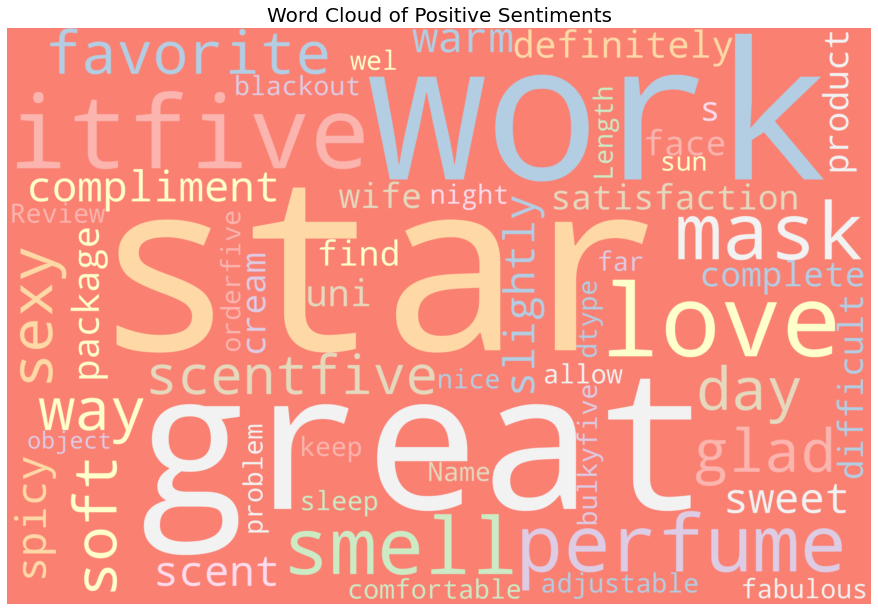

In [136]:
text = beauty_data[(beauty_data["Sentiment"] == 'Positive')]['Review']
wordcloud = WordCloud(
    width = 3000,
    height = 2000,
    background_color = 'salmon',
    colormap="Pastel1",
    stopwords = STOPWORDS).generate(str(text))
fig = plt.figure(
    figsize = (20, 8),
    facecolor = 'white',
    edgecolor = 'white')
plt.imshow(wordcloud, interpolation = 'bilinear')#interpolation='bilinear' specifies that the plot should use bilinear interpolation, 
                                                #which is a method for smoothing and resampling the image data to produce a higher-quality plot. 
                                                #This can make the word cloud look more visually appealing and readable.
plt.axis('off')
plt.tight_layout(pad=0)
plt.title("Word Cloud of Positive Sentiments",fontsize=20)
plt.show()

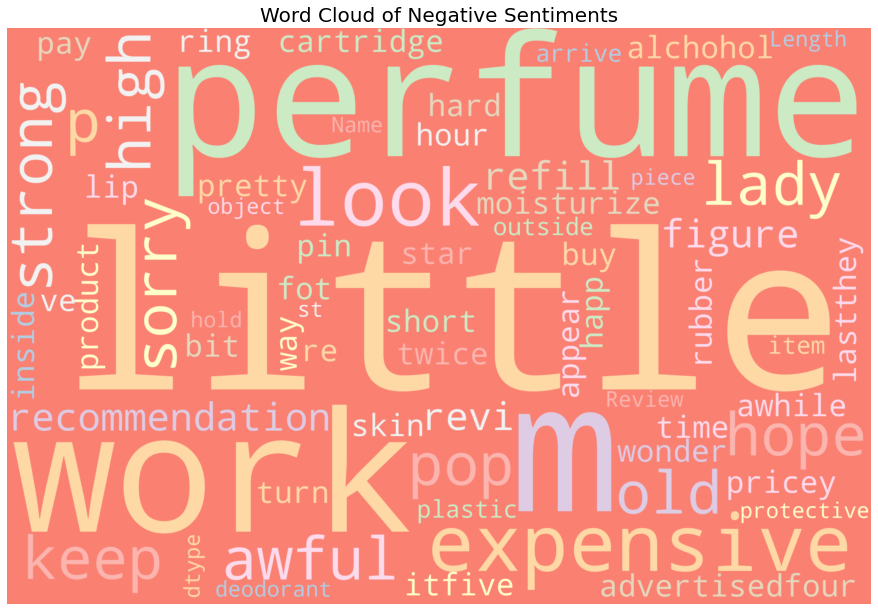

In [137]:
text = beauty_data[(beauty_data["Sentiment"] == 'Negative')]['Review']
wordcloud = WordCloud(
    width = 3000,
    height = 2000,
    background_color = 'salmon',
    colormap="Pastel1",
    stopwords = STOPWORDS).generate(str(text))
fig = plt.figure(
    figsize = (20, 8),
    facecolor = 'white',
    edgecolor = 'white')
plt.imshow(wordcloud, interpolation = 'bilinear')#interpolation='bilinear' specifies that the plot should use bilinear interpolation, 
                                                #which is a method for smoothing and resampling the image data to produce a higher-quality plot. 
                                                #This can make the word cloud look more visually appealing and readable.
plt.axis('off')
plt.tight_layout(pad=0)
plt.title("Word Cloud of Negative Sentiments",fontsize=20)
plt.show()

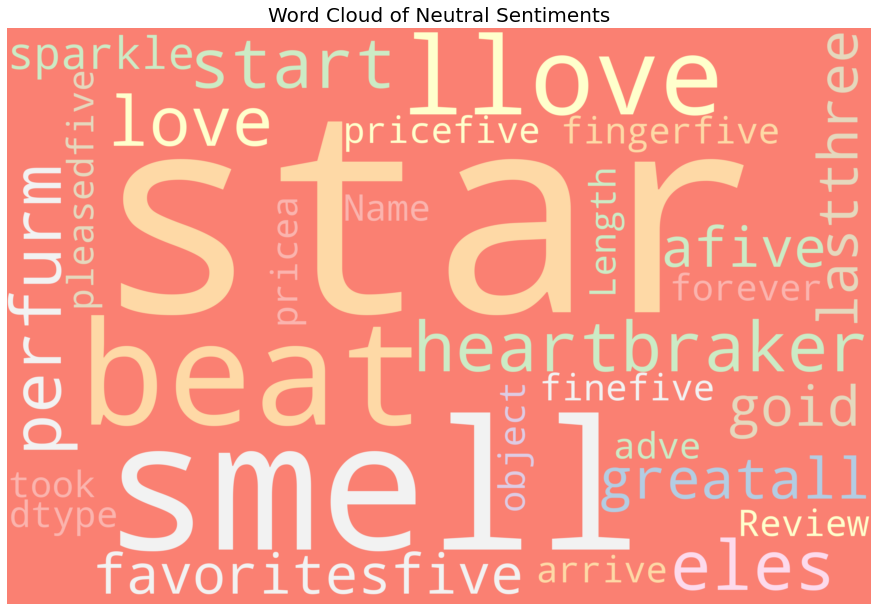

In [138]:
text = beauty_data[(beauty_data["Sentiment"] == 'Neutral')]['Review']
wordcloud = WordCloud(
    width = 3000,
    height = 2000,
    background_color = 'salmon',
    colormap="Pastel1",
    stopwords = STOPWORDS).generate(str(text))
fig = plt.figure(
    figsize = (20, 8),
    facecolor = 'white',
    edgecolor = 'white')
plt.imshow(wordcloud, interpolation = 'bilinear')#interpolation='bilinear' specifies that the plot should use bilinear interpolation, 
                                                #which is a method for smoothing and resampling the image data to produce a higher-quality plot. 
                                                #This can make the word cloud look more visually appealing and readable.
plt.axis('off')
plt.tight_layout(pad=0)
plt.title("Word Cloud of Neutral Sentiments",fontsize=20)
plt.show()

### Checking sentiment distriution.

<AxesSubplot:ylabel='Sentiment'>

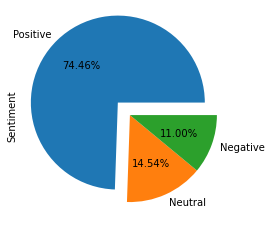

In [139]:
beauty_data['Sentiment'].value_counts().plot(kind='pie',autopct = '%0.2f%%',explode = [0.2,0,0])

#### Here we can observe that our distribution of reviews is not uniform. Hence for furthur classification models F1-Score would be the most appropiate evaluation measure to consider

##### Check brand columns

In [140]:
beauty_data[beauty_data['brand']== ''].shape[0]

1585

##### here 1748 empty string for brand so i replace brand to unkown

In [141]:
beauty_data['brand'] = beauty_data['brand'].replace('',"Unknown")

In [142]:
beauty_data[beauty_data['brand']== 'Unknown']

,asin,title,overall,brand,rank,verified,reviewerID,reviewerName,reviewTime,price,style,also_buy,also_view,main_cat,Review,polarity,Sentiment
27536,B000H723LU,SK-II Facial Treatment Essence,5,Unknown,396572,True,ACLZFBL64LT7Y,samira hammadi,2015-08-22,115.21,5 fl oz,[],"[B0739LQ1Z6, B00DW909OS, B075XFD9VP, B0716YHHN...",All Beauty,good product earthfive star,0.700000,Positive
27537,B000H723LU,SK-II Facial Treatment Essence,1,Unknown,396572,False,AS0GL9NAT7062,Jenny&#039;s review,2015-08-16,115.21,25 fl oz,[],"[B0739LQ1Z6, B00DW909OS, B075XFD9VP, B0716YHHN...",All Beauty,sk ii morning evening yr faithfully honestly d...,0.057407,Positive
27538,B000H723LU,SK-II Facial Treatment Essence,4,Unknown,396572,True,A8UWGWFEB6Y4J,Stacey,2015-08-12,115.21,25 fl oz,[],"[B0739LQ1Z6, B00DW909OS, B075XFD9VP, B0716YHHN...",All Beauty,I m not sure notice difference use skin tight ...,0.151558,Positive
27539,B000H723LU,SK-II Facial Treatment Essence,5,Unknown,396572,False,A1V26WSUG7Q9EG,Graham Wetzbarger,2015-08-12,115.21,5 fl oz,[],"[B0739LQ1Z6, B00DW909OS, B075XFD9VP, B0716YHHN...",All Beauty,I ve skii couple year discover sf launch party...,0.204545,Positive
27540,B000H723LU,SK-II Facial Treatment Essence,2,Unknown,396572,False,A95P5KAZCH9Y1,Jasmin E.,2015-07-17,115.21,5 fl oz,[],"[B0739LQ1Z6, B00DW909OS, B075XFD9VP, B0716YHHN...",All Beauty,base rave review expect product miracle worker...,0.210000,Positive
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
127692,B01FU073Z4,Naked Soap all natural Cleansing Face Soap for...,5,Unknown,417851,True,A12HBT75SDDVYI,Nargiza,2016-06-25,15.59,1,[B071S12WP7],"[B007M1ZQM2, B0009F79EQ, B072F8J72F, B07F2YKJFR]",All Beauty,hear soap friend live south korea recommend tr...,0.167172,Positive
127804,B01G96Z5MG,"Terra Pure Green Tea Lotion, 1.2 oz. In Jam Ja...",5,Unknown,236659,True,A1YEO5KEW7M2GF,jehammer,2018-09-15,66.00,12 oz 300 Count,"[B01G96Z49A, B01G96Z364, B01G96Z88M, B07CH832V...",[],All Beauty,cute button silver lid classy touch nice fresh...,0.360000,Positive
127805,B01G96Z5MG,"Terra Pure Green Tea Lotion, 1.2 oz. In Jam Ja...",5,Unknown,236659,True,A3JUGYDDDUXFRC,Kelsey E,2018-07-19,66.00,1 oz 50 Count,"[B01G96Z49A, B01G96Z364, B01G96Z88M, B07CH832V...",[],All Beauty,perfect size gift people thank yous christmas ...,0.900000,Positive
127806,B01G96Z5MG,"Terra Pure Green Tea Lotion, 1.2 oz. In Jam Ja...",5,Unknown,236659,False,A22H4HMNXNQ3BA,Kathleen,2016-08-17,66.00,12 oz 300 Count,"[B01G96Z49A, B01G96Z364, B01G96Z88M, B07CH832V...",[],All Beauty,find product lotion shampoo conditioner amazin...,0.162857,Positive


### Final cleaned data make csv

In [149]:
beauty_data.to_csv('beauty_cleandata11.csv')

In [150]:
import pandas as pd
df=pd.read_csv('beauty_cleandata11.csv')

In [151]:
df.isnull().sum()

Unnamed: 0      0
asin            0
title           0
overall         0
brand           0
rank            0
verified        0
reviewerID      0
reviewerName    3
reviewTime      0
price           0
style           0
also_buy        0
also_view       0
main_cat        0
Review          1
polarity        0
Sentiment       0
dtype: int64